In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the CSV files
train_data = pd.read_csv(r"C:\Users\user\Downloads\mnist_train\mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\user\Downloads\mnist_test\mnist_test.csv")

In [2]:
# Separate features and labels
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [3]:
# Reshape the data to its original shape (28x28)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(x_train)

In [5]:
# Generate augmented images for each image in the training dataset
augmented_images = []
augmented_labels = []
for i in range(len(x_train)):
    x = x_train[i].reshape((1, 28, 28, 1))
    y = y_train[i]
    it = datagen.flow(x, batch_size=1)
    for _ in range(5):  # Generate 5 augmented images per original image
        batch = next(it)
        augmented_images.append(batch[0])
        augmented_labels.append(y)

# Convert y_train to numpy array
augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
x_train_augmented = np.concatenate((x_train, augmented_images))
y_train_augmented = np.concatenate((y_train, augmented_labels))

In [6]:
# One-hot encode the labels
y_train_augmented = tf.keras.utils.to_categorical(y_train_augmented, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Define the LeNet-5 model architecture
def build_lenet(input_shape):
    # Define Sequential Model
    model = tf.keras.Sequential()

    # C1 Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))

    # S2 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # C3 Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))

    # S4 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
    model.add(tf.keras.layers.Flatten())

    # C5 Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    # FC6 Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

    # Output Layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the Model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, decay=0.0), metrics=['accuracy'])

    return model

In [8]:
# Build and compile the LeNet-5 model
model = build_lenet(input_shape=(28, 28, 1))

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [9]:
# Train the model
history = model.fit(x_train_augmented, y_train_augmented, epochs=5, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8335 - loss: 0.5338 - val_accuracy: 0.9776 - val_loss: 0.0706
Epoch 2/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9747 - loss: 0.0811 - val_accuracy: 0.9886 - val_loss: 0.0315
Epoch 3/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9897 - val_loss: 0.0324
Epoch 4/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9854 - loss: 0.0472 - val_accuracy: 0.9897 - val_loss: 0.0331
Epoch 5/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9921 - val_loss: 0.0245


In [10]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.9921 - loss: 0.0245
Test accuracy: 0.9921000003814697


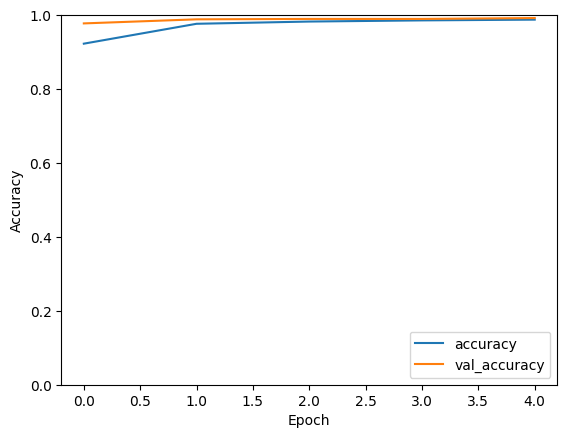

In [11]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
# Save the trained model
model.save('mnist_lenet_model.h5')